# **`Filtering and Sorting with Pokemon data`**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Pokemon.csv')

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## **Distribution of Pokemon Types**

<Axes: ylabel='count'>

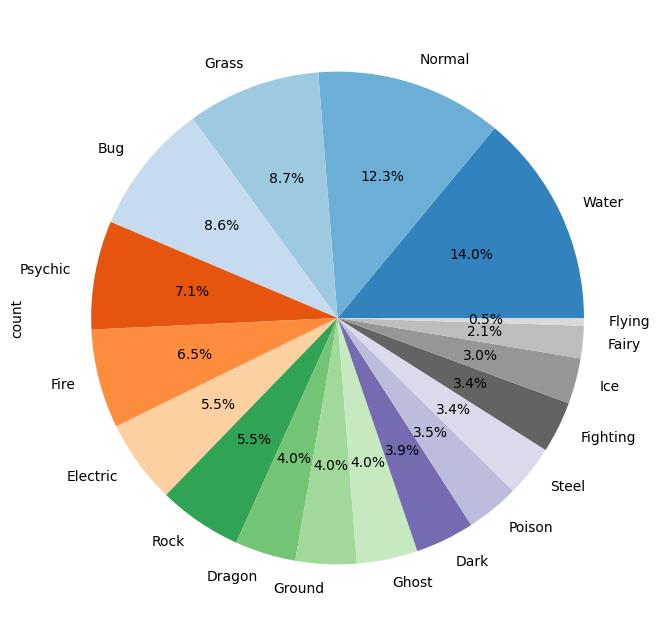

In [14]:
df['Type 1'].value_counts().plot(kind='pie', figsize=(10,8), autopct='%1.1f%%', cmap='tab20c')

<Axes: ylabel='Frequency'>

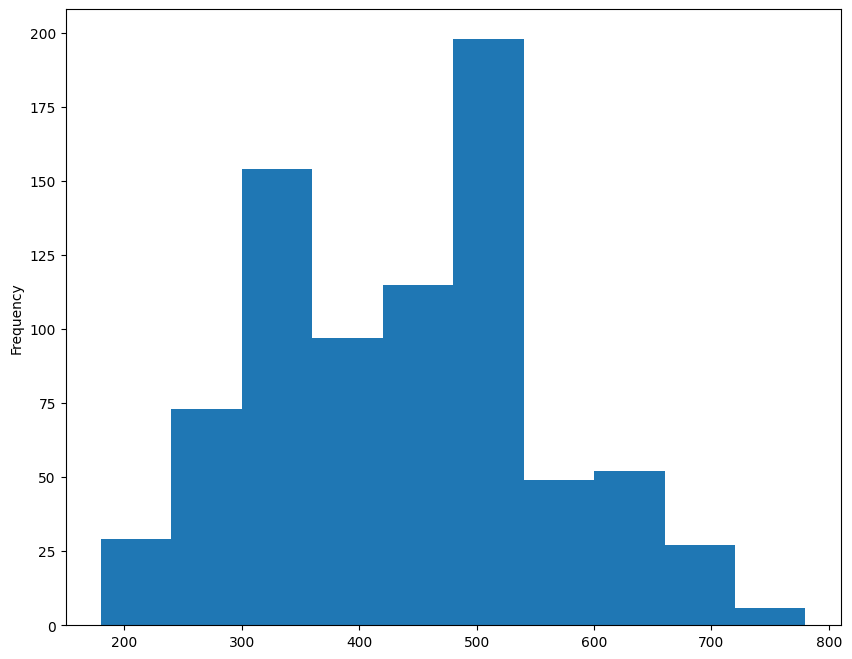

In [16]:
df['Total'].plot(kind='hist', figsize=(10,8))

<Axes: >

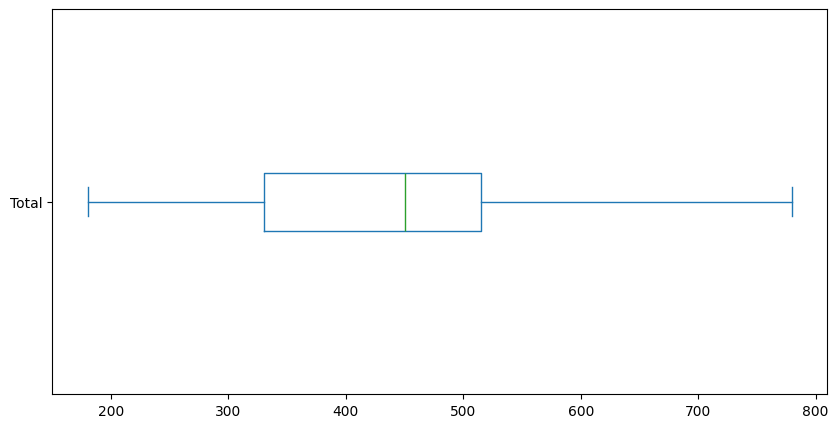

In [17]:
df['Total'].plot(kind='box', figsize=(10,5), vert=False)

<Axes: ylabel='count'>

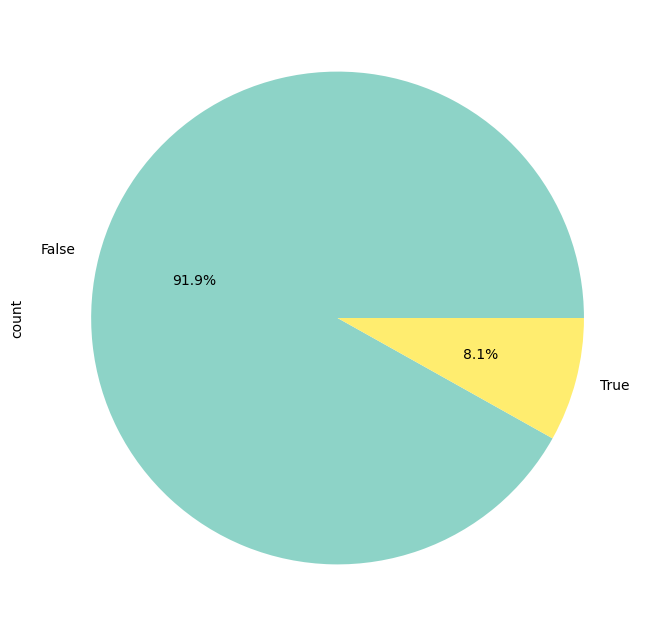

In [18]:
df['Legendary'].value_counts().plot(kind='pie', figsize=(10,8), autopct='%1.1f%%', cmap='Set3')

## **Basic Filtering**



<Axes: xlabel='Attack'>

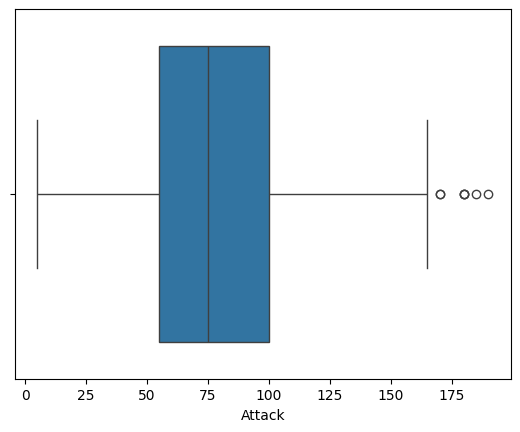

In [23]:
# How many Pokemons exist with an attack value greater than 150?
sns.boxplot(data=df, x='Attack')

In [29]:
# df.loc[df['Attack'] > 150]
# df[df['Attack'] > 150].shape[0]
df.query('Attack > 150').shape[0]

18

<Axes: xlabel='Speed'>

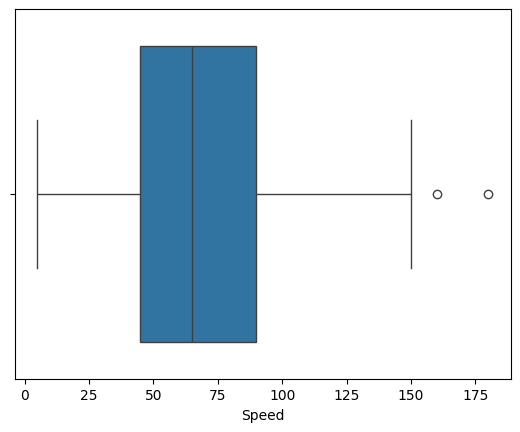

In [32]:
# Select all Pokemons with a speed of 10 or less
sns.boxplot(data=df, x='Speed')

In [36]:
df.query('Speed <= 10').shape[0]

5

<Axes: xlabel='Sp. Def'>

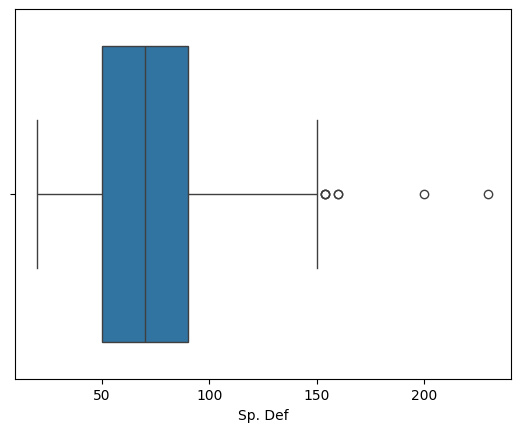

In [37]:
# How many Pokemons have a Sp. Def value of 25 or less?
sns.boxplot(data=df, x='Sp. Def')

In [48]:
# df.query('`Sp. Def` <= 25').shape[0]
# df[df['Sp. Def']<= 25].shape[0]
df.loc[df['Sp. Def'] <= 25].shape[0]

18

In [57]:
# Select all the Leendary Pokemons
# df.query('Legendary == True').shape[0]
df.loc[df['Legendary']].shape[0]
# df.loc[~df['Legendary']]  --> Those who are not legendary

65

## **Finding the Outlier**

<Axes: xlabel='Defense', ylabel='Attack'>

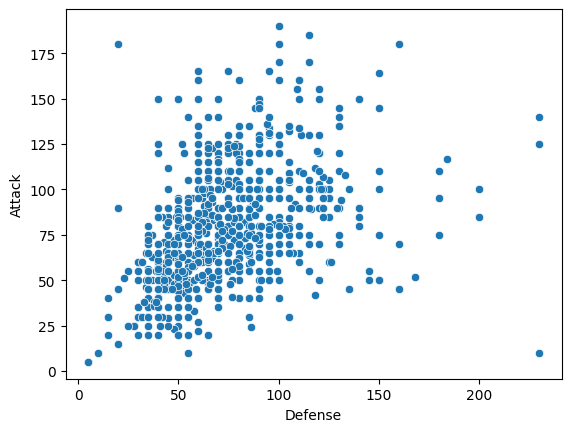

In [59]:
# Find out the pokemons that is clearly an outlier in terms of Attack/Defence
sns.scatterplot(data=df, y='Attack', x='Defense')

In [71]:
#df.loc[df['Defense'] == df['Defense'].max()]
df.sort_values(by=['Defense', 'Attack'], ascending=[False, True]).head(1)['Name']

,Name
230,Shuckle


In [78]:
# How many Fire-Flying Pokemons are there? How many pokemons are of Type 1 Fire and Type 2 Flying?
df.query('`Type 1` == "Fire" & `Type 2` == "Flying"').shape[0]

6

In [90]:
# How many 'Poison' pokemons are there?
# df.query('`Type 1` == "Poison" | `Type 2` == "Poison"').shape[0]
df.loc[(df['Type 1'] == 'Poison') | (df['Type 2'] == 'Poison')].shape[0]

62

In [100]:
# What Pokemon of Type 1 Ice has the strongest defense?
df.query('`Type 1` == "Ice"').sort_values(by='Defense', ascending=False).iloc[0,1]

'Avalugg'

In [123]:
# What's the most common type of Legendary Pokemon?
df.query('Legendary == True')['Type 1'].value_counts().head(1)
# df.query('Legendary == True')['Type 2'].value_counts().head(1)

,count
Type 1,
Psychic,14


<Axes: xlabel='Type 1'>

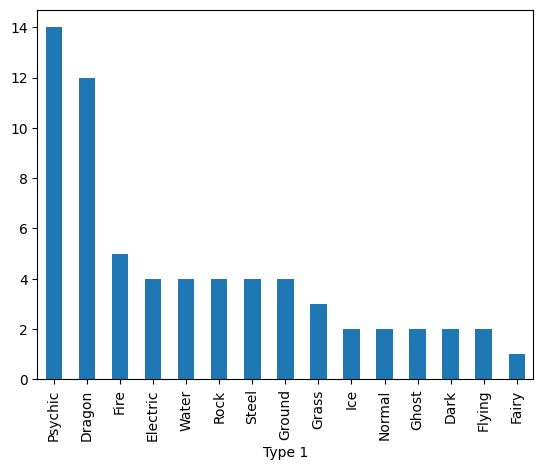

In [124]:
df.query('Legendary == True')['Type 1'].value_counts().plot(kind='bar')

<Axes: xlabel='Generation'>

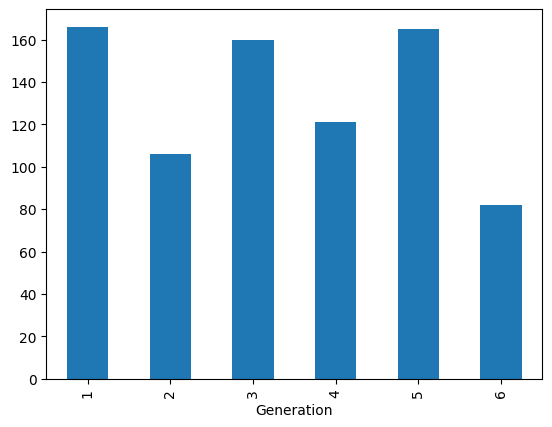

In [140]:
# What's the most powerful pokemon from the firest 3 generations, of type water?
df['Generation'].value_counts(sort=False).plot(kind='bar')

In [142]:
df.query('`Type 1` == "Water" & Generation.isin([1,2,3])').sort_values(by='Total', ascending=False).iloc[0,1]

'KyogrePrimal Kyogre'

In [151]:
# Whats the most powerful dragon from the last two generations?
df.query('((`Type 1` == "Dragon") | (`Type 2` == "Dragon")) & Generation.isin([5,6])').sort_values(by='Total', ascending=False).iloc[0,1]


'KyuremBlack Kyurem'

In [163]:
# Select the most powerful Fire type pokemons - Select all pokemons that ahave an Attack value above 100 and Type 1 equals to Fire (ignore Type 2 in this activity)
df.query('`Type 1` == "Fire" & Attack > 100')['Name']

,Name
7,CharizardMega Charizard X
8,CharizardMega Charizard Y
64,Arcanine
147,Flareon
263,Entei
270,Ho-oh
278,Blaziken
279,BlazikenMega Blaziken
354,CameruptMega Camerupt
437,Infernape


In [166]:
# Select all pokemons that are of Type 1 Water and Type 2 Flying. Store the selection in the variablewater_flying_df.
water_flying_df = df.query('`Type 1` == "Water" & `Type 2` == "Flying"')
water_flying_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,278,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,279,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,458,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False


In [168]:
# perform a selection  in your Dataframe of all the Legendary pokemons that are of type 1 fire. But select only the coclumns Name, Attack and Generation. Store the results in a variable legendary_fire_df.
legendary_fire_df = df.query('Legendary == True & `Type 1` == "Fire"')[['Name', 'Attack', 'Generation']]
legendary_fire_df.head()

,Name,Attack,Generation
158,Moltres,100,1
263,Entei,115,2
270,Ho-oh,130,2
542,Heatran,90,4
799,Volcanion,110,6


### Select Slow and Fast pokemons
select pokemons that are either very slow (with Speed below the bottom 5%) or very fast (Speed above 95%). Store your result in the variable slow_fast_df.

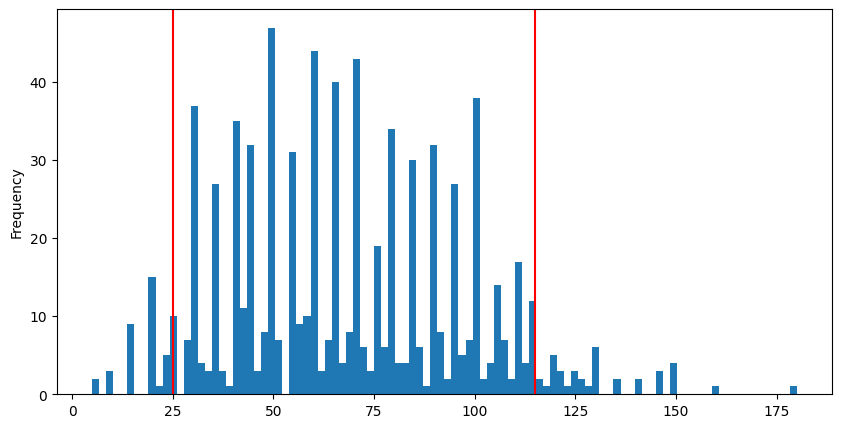

In [169]:
ax = df['Speed'].plot(kind='hist', bins=100, figsize=(10,5))
ax.axvline(df['Speed'].quantile(0.05), color='red')
ax.axvline(df['Speed'].quantile(0.95), color='red')

In [171]:
slowest = df["Speed"].quantile(0.05)
fastest = df["Speed"].quantile(0.95)
slow_fast_df = df.query('Speed < @slowest | Speed > @fastest')
slow_fast_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
56,51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
70,65,Alakazam,Psychic,NaN,500,55,50,45,135,95,120,1,False


### Find the Ultra Powerful Legendary Pokemons

<Axes: xlabel='Defense', ylabel='Attack'>

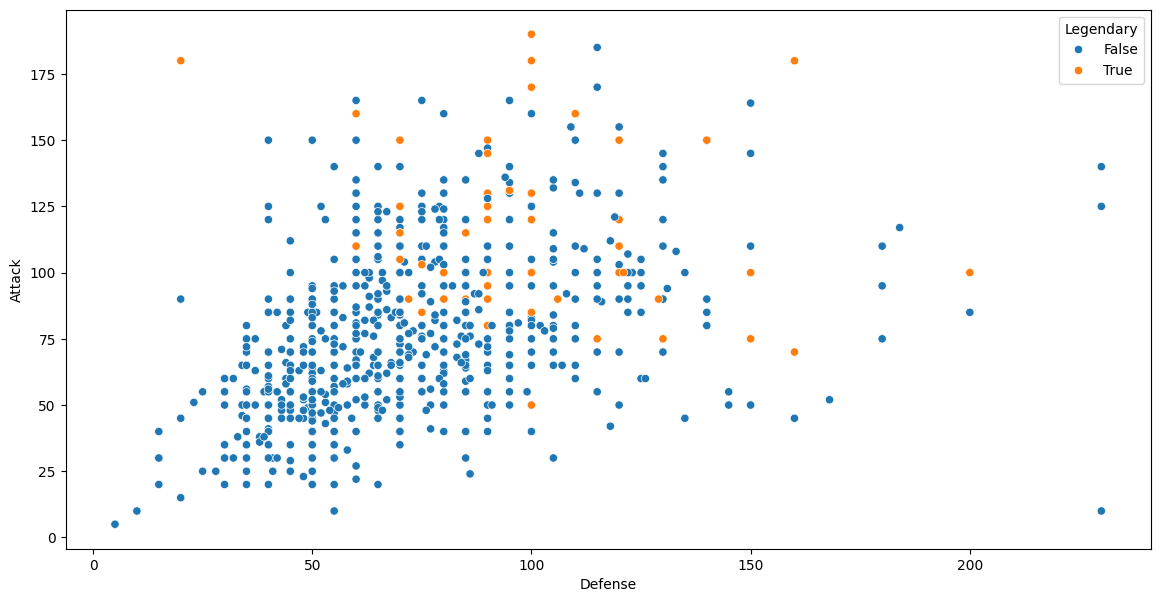

In [172]:
fig, ax = plt.subplots(figsize=(14, 7))
sns.scatterplot(data=df, y='Attack', x='Defense', hue='Legendary', ax=ax)

Take a look at the scatter plot correlating Defense to Attack. What's the Name of the pokemon which has defense value greater than 150 and Attack value is greater than 175 in the image above?

In [179]:
df.query('(Defense >= 150 & Attack >= 175) & Legendary == True').iloc[0,1]

'GroudonPrimal Groudon'